#User Churn Prediction using Machine Learning

###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Dataset

In [ ]:
url = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7032, 20)

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

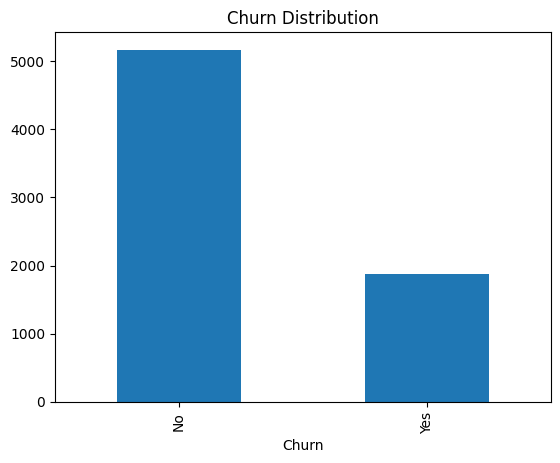

In [ ]:
df.info()
df['Churn'].value_counts().plot(kind='bar', title='Churn Distribution')

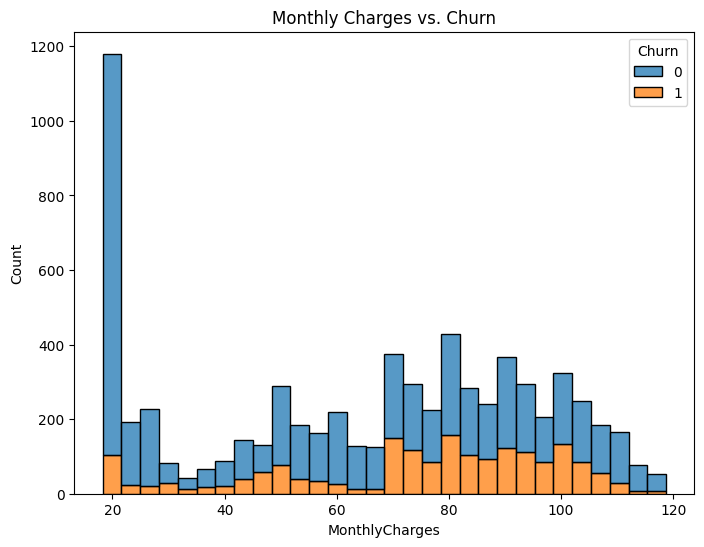

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Monthly Charges vs. Churn')
plt.show()

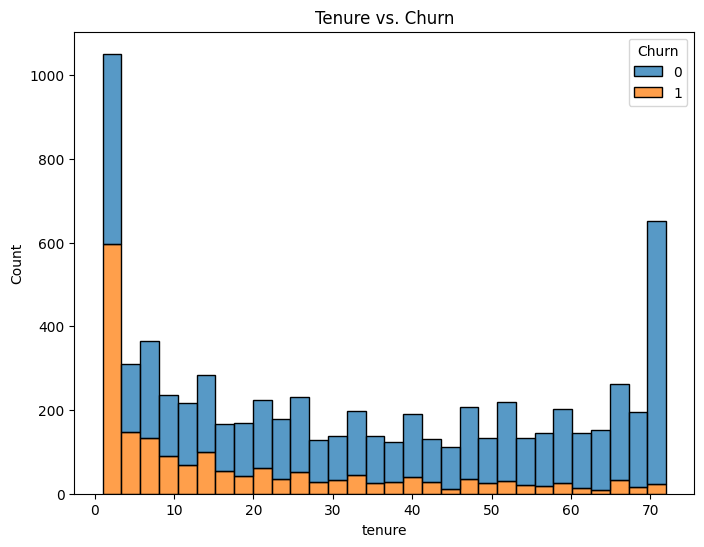

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure vs. Churn')
plt.show()

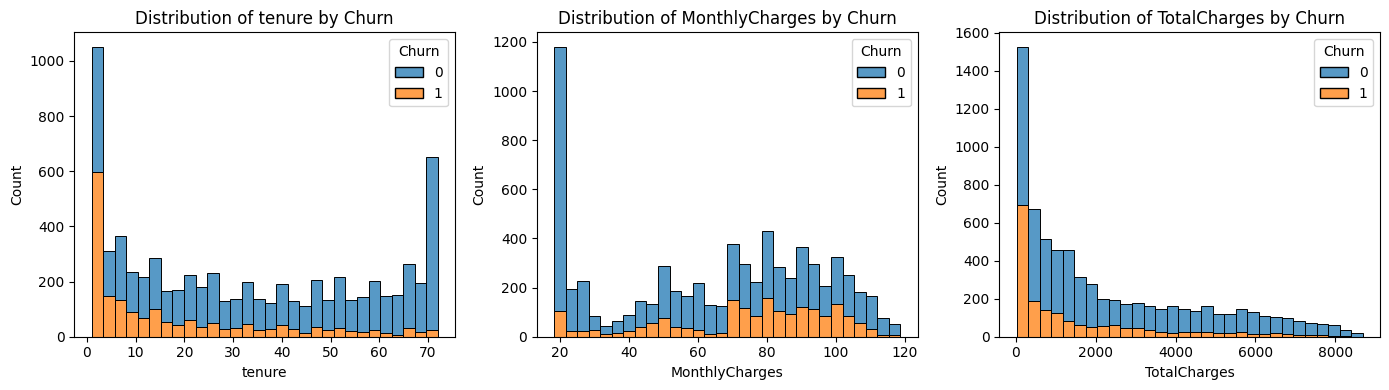

In [ ]:
# Histograms for numerical features grouped by Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(14, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='Churn', multiple='stack', bins=30)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
df = df.drop(['customerID'], axis=1)  # Remove ID
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()  # Drop rows with missing TotalCharges

# Encode categorical variables

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X = df.drop('Churn', axis=1)
y = df['Churn']
X = scaler.fit_transform(X)

#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#Evaluation

Accuracy: 0.7853589196872779
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.77      1407



<Axes: >

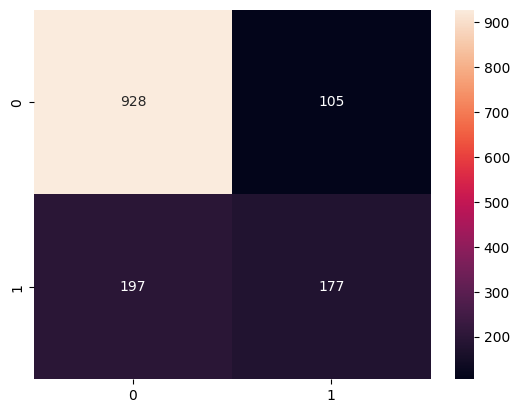

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [ ]:
for i in range(10):
    print(f"User {i+1} - Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

User 1 - Actual: 0, Predicted: 0
User 2 - Actual: 0, Predicted: 0
User 3 - Actual: 1, Predicted: 1
User 4 - Actual: 0, Predicted: 0
User 5 - Actual: 0, Predicted: 0
User 6 - Actual: 0, Predicted: 1
User 7 - Actual: 0, Predicted: 0
User 8 - Actual: 0, Predicted: 1
User 9 - Actual: 0, Predicted: 0
User 10 - Actual: 0, Predicted: 0
